# Campaign Contributions

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1ftdw7L9Z6WQJ6i0SXj030PA7ObsXfPsg/view?usp=sharing. You should download and save this file in a folder outside where this notebook is stored. This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

This file is already cleaned and ready to use - you **do not** need to filter or clean it anymore! (you may not agree with the how it was cleaned but please use this file as is).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## Setup

Run the cell below as it will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv('/home/vanel/github/2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])

# Note - for now, it is okay to ignore the warning about mixed types.

/tmp/ipykernel_670/2446900869.py:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  contrib = pd.read_csv('/home/vanel/github/2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])


## 1. Plotting Data (30 points)

Your boss asked for you to make a few charts from the dataset to better explore the information. 

**1a.** Plotting a histogram of contribute amount (10 points)

Make a histogram of the **full range** of values in the `contb_receipt_amt` variable. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

Based on the histogram - what range of contributions have the highest count frequency?

817 20 174


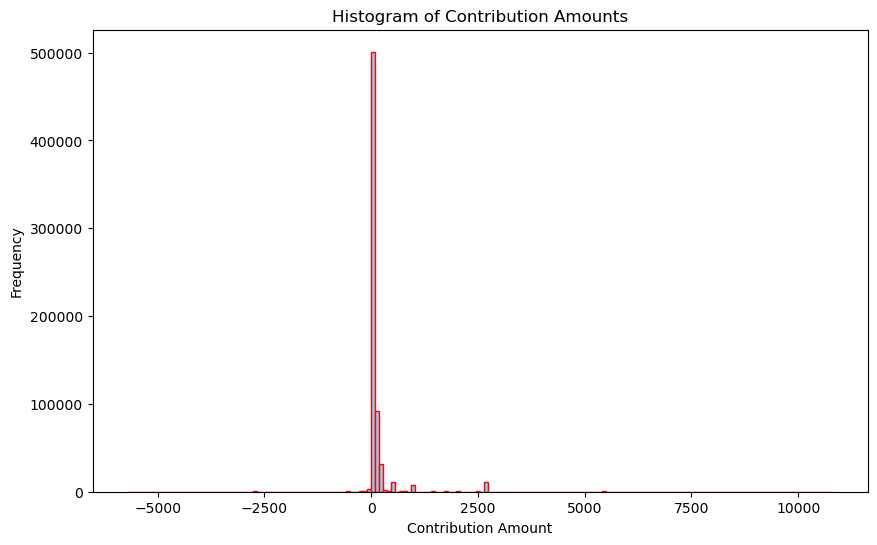

Range of contributions with the highest count frequency: (-10.34482758620652, 84.48275862069022)


In [2]:
# 1a YOUR CODE HERE
# # of rows in data frame
n = 668864

# Calculating number of bins using different rules
bin_sqrt = int(np.sqrt(n))
bin_sturges = int(np.log2(n)) + 1
bin_rice = int(2 * n**(1/3))
print(bin_sqrt, bin_sturges, bin_rice,)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(contrib['contb_receipt_amt'], bins = 174, color='skyblue', edgecolor='red')

# Add title and labels
plt.title('Histogram of Contribution Amounts')
plt.xlabel('Contribution Amount')
plt.ylabel('Frequency')
plt.show()

# Calculate histogram
hist, bin_edges = np.histogram(contrib['contb_receipt_amt'], bins=174)

# finding the range of the bin
max_freq_index = np.argmax(hist)
max_freq_range = (bin_edges[max_freq_index], bin_edges[max_freq_index + 1])

# Print the range of contributions with the highest frequency
print("Range of contributions with the highest count frequency:", max_freq_range)


- **1a answer here:** 

The contributions with the highest count of frequency falls within the range of 0 to 84 dollars. This suggests that most of the contributions fall within this range. The presence of negative values might indicate refunds or reversed transactions, and the positive values up to approximately 84 dollars might represent the most common contribution amounts. 

**Bin selection:**
For the bin size, I started with 50 bins but there were too many details that were hidden within the range so I calculated the formulas below to select the appropriate bins to use;

1. **Square Root Rule:** Choose the number of bins as the square root of the number of data points. The number of bins would be the square root of 668,864, which is approximately 817.
2. **Sturges' Rule:** Calculate the number of bins using the formula 1 + log2(n) where n is the number of data points. The number of bins would be 1 + log2(668,864), which is approximately 1 + 19.68, rounded to 20. This showed even less details than 50 bins. 
3. **Rice Rule:** Suggests 2 * n^(1/3) bins. The number of bins would be 2 * (668,864)^(1/3), which is approximately 2 * 87.38, rounded to 174

**Considering these principles:**

The histogram with 817 bins is too fine-grained, potentially resulting in a noisy distribution where the patterns are hard to discern because of the large number of bins.

The histogram with 174 bins is likely to provide a more generalized view of the data. The level of granularity is eases identifying the overall distribution shape and the central tendency, and understanding broader patterns in the data.based on the purpose for analysis, The histogram with 174 bins was selected because it will allow me  to more easily identify the range where the majority of contributions fall.

**1b.** Plotting a histogram of contribute amount (10 points)

Make a 'zoomed-in' histogram of the range that had the highest count frequencies from 1a above. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

What are some insights that you can see from these two histograms (1a and 1b)?

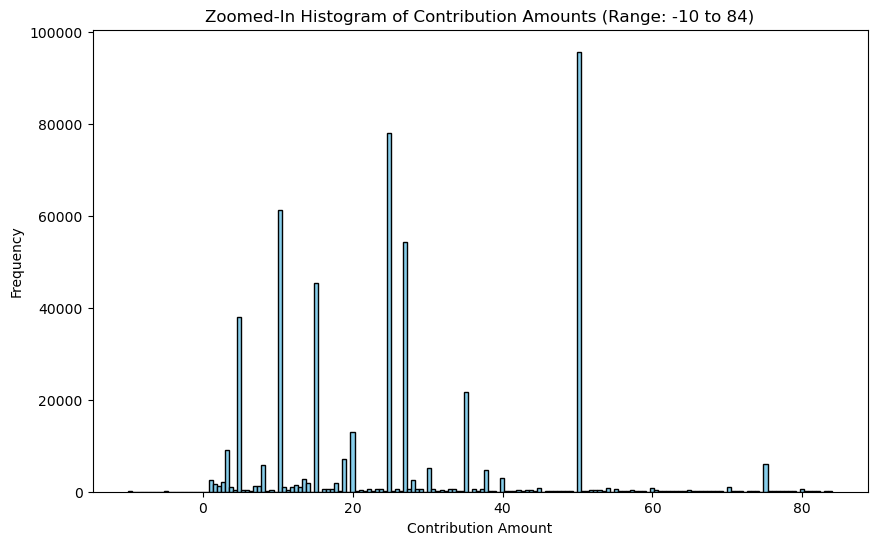

In [3]:
# 1b YOUR CODE HERE
# Plot zoomed-in histogram
plt.figure(figsize=(10, 6))
plt.hist(contrib['contb_receipt_amt'], bins=174, range=(-10, 84.0), color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Zoomed-In Histogram of Contribution Amounts (Range: -10 to 84)')
plt.xlabel('Contribution Amount')
plt.ylabel('Frequency')

# Show plot
plt.show()


- **1b answer here:** 

With a zoomed in image of the range from 1a, we can observe the following:

**Concentration of Small Contributions:** The smaller concentration of contributions are more apparent in 1b. observing even smaller contribiution amounts. 1b histogram suggests that a significant portion of the contributions are small amounts. This could indicate a grassroots fundraising approach, where a large number of donors contribute smaller amounts of money.

**Spikes at Specific Amounts:** There are visible spikes at specific contribution amounts with the highest being at $50. This could indicate popular donation tiers. For example, there are spikes at 25, 50 dollars, these could be pre-set contribution levels suggested to donors.

**Negative Contributions:** 1a seemed to have some contributions in the negative range but it can barely be seen in 1b.

**Most popular contribution range**: Most popular contribution range appears to be arounf $50 followed by ~ $25.

**1a Histogram:**

1. Shows the overall distribution of contributions from the minimum to the maximum values.
2. Helps identify the presence of outliers or extreme values that are significantly different from the bulk of the data.
3. Offers a high-level view of the data's range which can sometimes make it challenging to observe detailed patterns due to the scale.

**1b Zoomed-In Histogram:**
1. Shows a detailed view of a specific range of the most frequent contribution amounts.
2. Makes it easier to observe finer patterns and trends that are not discernible in the full-range histogram.
3. Reveals the concentration of data points around specific values, suggesting common donation amounts.

**1c.** Present a time-series line chart with the following elements (10 points)  

- The chart needs to have two lines - one for Bernie Sanders and one for Hillary Clinton.
- Show the date on the x-axis
- Add vertical lines for these dates of the primary debates: 17 Jan 2016, 11 Feb 2016, 9 Mar 2016
- Show the total contribution amount for that day on the y-axis
- Include a title
- Include axis labels

How did the debates effect fundraising / donations? Did fundraising increase or decrease after the debates for each candidate?

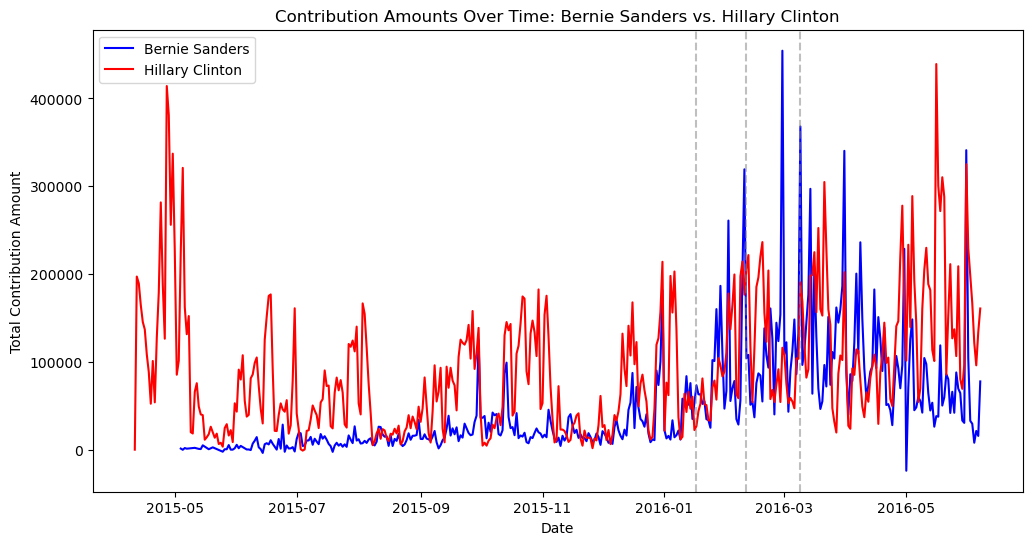

In [4]:
# 1c YOUR CODE HERE

# Filter data for Bernie Sanders and Hillary Clinton
bernie_data = contrib[contrib['cand_nm'] == 'Sanders, Bernard']
hillary_data = contrib[contrib['cand_nm'] == 'Clinton, Hillary Rodham']

# Convert 'contb_receipt_dt' column to datetime
contrib['contb_receipt_dt'] = pd.to_datetime(contrib['contb_receipt_dt'])

# Group data by date and sum contribution amounts
bernie_daily = bernie_data.groupby('contb_receipt_dt')['contb_receipt_amt'].sum()
hillary_daily = hillary_data.groupby('contb_receipt_dt')['contb_receipt_amt'].sum()

# Plot the time-series line chart
plt.figure(figsize=(12, 6))
plt.plot(bernie_daily.index, bernie_daily.values, label='Bernie Sanders', color='blue')
plt.plot(hillary_daily.index, hillary_daily.values, label='Hillary Clinton', color='red')

# Add vertical lines for primary debates
debate_dates = pd.to_datetime(['2016-01-17', '2016-02-11', '2016-03-09'])
for date in debate_dates:
    plt.axvline(x=date, color='gray', linestyle='--', alpha=0.5)

# Add title and labels
plt.title('Contribution Amounts Over Time: Bernie Sanders vs. Hillary Clinton')
plt.xlabel('Date')
plt.ylabel('Total Contribution Amount')

# Add legend
plt.legend()

# Show plot
plt.show()

- **1c answer here:** 

Looking at the chart, it appears that both candidates received a fluctuation in fundraising around the dates of the debates. After the debate on January 17, Bernie Sanders shows a significant increase in contributions, which peaks shortly after the debate date. Hillary Clinton also shows an increase, although it is less pronounced than that of Bernie Sanders.

Following the February 11 debate, both candidates exhibit an increase in contributions. The pattern is somewhat similar to the January debate, with Bernie Sanders showing a more notable peak in contributions than Hillary Clinton.

After the March 9 debate, there is an increase in contributions for Bernie Sanders, indicated by the rise in the blue line. Hillary Clinton's contributions also show an uptick but less dramatically.

From this chart, it seems that the debates had a stimulating effect on fundraising for both candidates, with Bernie Sanders consistently showing a stronger response in terms of contribution amounts after each debate. This trend suggests that the debates were effective events for mobilizing donor support for both candidates, with a more marked effect for Bernie Sanders.

## 2. Exploring Campaign Contributions (35 points)

Let's investigate the donations to the candidates. (5 points)

**2a.** Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number/count of contributions (variable 'contb_receipt_amt')?

In [5]:
# 2a YOUR CODE HERE

# Group by candidate and count the number of donations
donation_counts = contrib.groupby('cand_nm').size().reset_index(name='Number of Donations')

# Sort the DataFrame by the number of donations in descending order
donation_counts_sorted = donation_counts.sort_values(by='Number of Donations', ascending=False)

# Display the sorted table
print(donation_counts_sorted)

                      cand_nm  Number of Donations
18           Sanders, Bernard               379284
3     Clinton, Hillary Rodham               171104
4   Cruz, Rafael Edward 'Ted'                56355
1         Carson, Benjamin S.                27015
17               Rubio, Marco                13267
5              Fiorina, Carly                 4679
15                 Paul, Rand                 4164
21           Trump, Donald J.                 3806
0                   Bush, Jeb                 3056
11            Kasich, John R.                 2957
22              Walker, Scott                  666
8              Huckabee, Mike                  531
13    O'Malley, Martin Joseph                  392
12           Lessig, Lawrence                  353
2    Christie, Christopher J.                  333
7          Graham, Lindsey O.                  305
20                Stein, Jill                  180
23      Webb, James Henry Jr.                  106
16     Perry, James R. (Rick)  

- **2a answer here:** 

Based on the provided table, it is evident that Bernie Sanders received the largest number of contributions with a total of 379,284 donations.

**2b.** Now, present a table that shows the total value of donations to each candidate sorted by total value of the donations. (5 points)

Which candidate raised the most money in California?

In [6]:
# 2b YOUR CODE HERE

# Filter the data for donations from California
california_contrib = contrib[contrib['contbr_st'] == 'CA']

# Group by candidate and sum the contribution amounts
total_contributions_ca = california_contrib.groupby('cand_nm')['contb_receipt_amt'].sum().reset_index(name='Total Contribution Amount')

# Sort the DataFrame by the total contribution amount in descending order
total_contributions_ca_sorted = total_contributions_ca.sort_values(by='Total Contribution Amount', ascending=False)

# Display the sorted table
print(total_contributions_ca_sorted)

                      cand_nm  Total Contribution Amount
3     Clinton, Hillary Rodham              38,969,122.68
18           Sanders, Bernard              19,062,998.80
4   Cruz, Rafael Edward 'Ted'               5,926,568.27
17               Rubio, Marco               4,998,700.92
0                   Bush, Jeb               3,316,836.83
1         Carson, Benjamin S.               3,022,105.15
5              Fiorina, Carly               1,473,989.42
11            Kasich, John R.               1,471,417.54
21           Trump, Donald J.                 868,672.16
15                 Paul, Rand                 721,563.14
22              Walker, Scott                 492,706.90
2    Christie, Christopher J.                 456,066.00
7          Graham, Lindsey O.                 379,495.00
13    O'Malley, Martin Joseph                 297,334.26
8              Huckabee, Mike                 230,890.60
16     Perry, James R. (Rick)                 208,400.00
12           Lessig, Lawrence  

- **2b answer here:** 

Hillary Clinton raised the most money in California with a total contribution amount of $38,969,122.68

**2c.** Combine the tables (sorted by either a or b above). (5 points)

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [7]:
# 2c YOUR CODE HERE

# Merge the tables
merged_table = pd.merge(donation_counts_sorted, total_contributions_ca_sorted, on ='cand_nm', how='outer')

# Rename 'cand_nm' column to 'Candidate Name' in the merged table
merged_table.rename(columns={'cand_nm': 'Candidate Name'}, inplace=True)

# Display the merged table
print(merged_table)

               Candidate Name  Number of Donations  Total Contribution Amount
0            Sanders, Bernard               379284              19,062,998.80
1     Clinton, Hillary Rodham               171104              38,969,122.68
2   Cruz, Rafael Edward 'Ted'                56355               5,926,568.27
3         Carson, Benjamin S.                27015               3,022,105.15
4                Rubio, Marco                13267               4,998,700.92
5              Fiorina, Carly                 4679               1,473,989.42
6                  Paul, Rand                 4164                 721,563.14
7            Trump, Donald J.                 3806                 868,672.16
8                   Bush, Jeb                 3056               3,316,836.83
9             Kasich, John R.                 2957               1,471,417.54
10              Walker, Scott                  666                 492,706.90
11             Huckabee, Mike                  531              

**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation** (5 points)

Which candidate had the highest average donation?

In [8]:
# 2d YOUR CODE HERE

# Calculate the average donation amount per candidate for California
merged_table['Average Donation Amount'] = merged_table['Total Contribution Amount'] / merged_table['Number of Donations']

# Sort the table by the average donation
merged_table_sorted_by_avg_donation = merged_table.sort_values(by='Average Donation Amount', ascending=False)

# Print the sorted table
print(merged_table_sorted_by_avg_donation)

               Candidate Name  Number of Donations  Total Contribution Amount  \
23       Gilmore, James S III                    3                   8,100.00   
18     Perry, James R. (Rick)                  104                 208,400.00   
22          Pataki, George E.                   20                  30,450.00   
14   Christie, Christopher J.                  333                 456,066.00   
15         Graham, Lindsey O.                  305                 379,495.00   
8                   Bush, Jeb                 3056               3,316,836.83   
12    O'Malley, Martin Joseph                  392                 297,334.26   
21              Jindal, Bobby                   31                  23,231.26   
10              Walker, Scott                  666                 492,706.90   
17      Webb, James Henry Jr.                  106                  76,568.16   
9             Kasich, John R.                 2957               1,471,417.54   
20              Johnson, Gar

- **2d answer here:** 

The candidate with the highest average donation was Gilmore, James S III, with an average donation amount of $2,700.00.

**2e. Plotting a Bar Chart** (10 points)

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Sort by total value of the donations
- Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

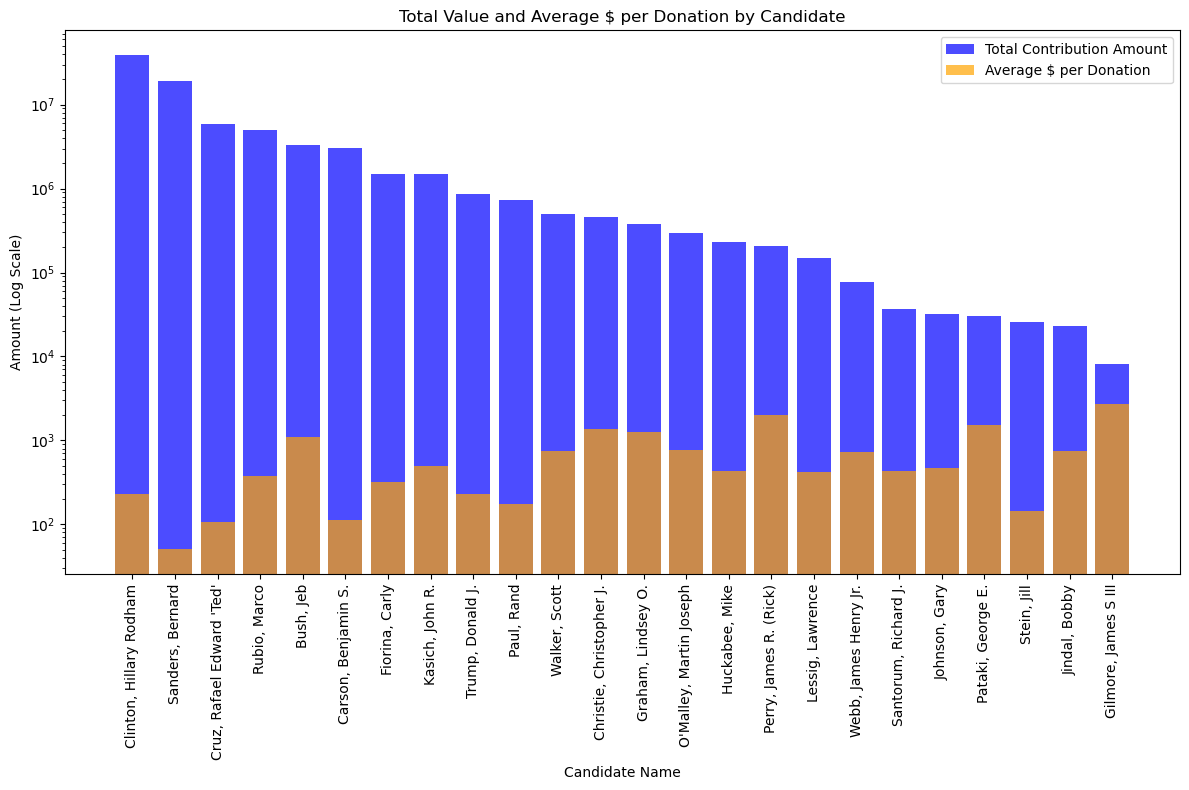

In [9]:
# 2e YOUR CODE HERE

# Sort the DataFrame by the total contribution amount
merged_table_sorted = merged_table.sort_values(by='Total Contribution Amount', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))

# Total Contribution Amount bar
plt.bar(merged_table_sorted['Candidate Name'], merged_table_sorted['Total Contribution Amount'], label='Total Contribution Amount', color='blue', alpha=0.7)

# Average Donation Amount bar
plt.bar(merged_table_sorted['Candidate Name'], merged_table_sorted['Average Donation Amount'], label='Average $ per Donation', color='orange', alpha=0.7)

# Set log scale for y-axis
plt.yscale('log')

# Title and labels
plt.title('Total Value and Average $ per Donation by Candidate')
plt.xlabel('Candidate Name')
plt.ylabel('Amount (Log Scale)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()


**2f. Comment on the results of your data analysis in a short paragraph.** (5 points)

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

- **2f answer here:** 

From the table of campaign contributions in California for the 2016 U.S. presidential primary races, several key insights emerge:

**Candidate Fundraising Disparities:** The contributions vary widely among candidates, with some receiving millions of dollars while others receive only thousands. This indicates disparities in fundraising capabilities and support levels among candidates.

**Donor Engagement and Support:** The number of donations reflects the level of grassroots support and donor engagement for each candidate. Candidates with a higher number of donations likely have a broader base of support within California.

**Average Donation Sizes:** The average donation amounts offer insights into the typical contribution size for each candidate. Some candidates may rely on smaller individual donations from a large number of supporters, while others attract larger donations from fewer contributors.

**Candidate Popularity and Appeal:** Candidates with higher total contribution amounts likely enjoy greater popularity and appeal among California voters. This support may be influenced by factors such as candidate messaging, policy positions, campaign strategies, and media coverage.

**Effectiveness of Fundraising Strategies:** The success of fundraising efforts varies among candidates and reflects the effectiveness of their fundraising strategies. Candidates with strong fundraising operations can mobilize support and attract contributions from a diverse donor base.

**Political Landscape in California:** The distribution of campaign contributions provides insights into the political landscape and voter preferences within California during the primary races. It reflects the alignment of candidates with the interests, values, and ideologies of California voters.

Overall, the analysis of campaign contributions in California highlights the diversity of donor behavior, fundraising dynamics, and candidate support levels during the 2016 U.S. presidential primary races. These insights contribute to a deeper understanding of the political landscape and electoral dynamics within the state.

Hillary Clinton and Bernie Sanders appear to have the most support in the state of California. I noticed that even though Bernie Sanders has the highest number of donations, Hillary Clinton has the highest total dollar sum of contributions doubling that of Bernie Sanders. This suggests that the average donations for Sanders is significantly smaller than Clintons. It would be interesting to look at the the profile of donors to each campaign to further analyze their job titles. I also noticed the candidate with the highest average donations appears to have the least amount of support in California. 

## 3. Exploring Donor Occupations (35 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a.** Show the top 5 occupations of individuals that contributed to Hillary Clinton. (5 points)

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [10]:
# 3a YOUR CODE HERE
# Subset the data for donations to Hillary Clinton
clinton_donations = contrib[contrib['cand_nm'] == 'Clinton, Hillary Rodham']

# Get the top 5 occupations of donors to Hillary Clinton
top_occupations_clinton = clinton_donations['contbr_occupation'].value_counts().head()

# Display the top 5 occupations
print(top_occupations_clinton)


RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: contbr_occupation, dtype: int64


**3b.** Write a function called `get_donors`. (5 points)
 
Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [11]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # 3b YOUR CODE HERE
    # Get the top 5 occupations of donors
    top_occupations = df['contbr_occupation'].value_counts().head()
    
    return top_occupations


**3c.** Now run the `get_donors` function from 3b on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below. (5 points)

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [12]:
# 3c YOUR CODE HERE

# Subset the data for donations to Hillary Clinton
clinton_donations = contrib[contrib['cand_nm'] == 'Clinton, Hillary Rodham']
# Get top 5 occupations for Hillary Clinton
clinton_top_occupations = get_donors(clinton_donations)
print("Top 5 occupations of donors to Hillary Clinton:")
print(clinton_top_occupations)
print()

# Subset the data for donations to Bernie Sanders
sanders_donations = contrib[contrib['cand_nm'] == 'Sanders, Bernard']
# Get top 5 occupations for Bernie Sanders
sanders_top_occupations = get_donors(sanders_donations)
print("Top 5 occupations of donors to Bernie Sanders:")
print(sanders_top_occupations)
print()

# Subset the data for donations to Donald Trump
trump_donations = contrib[contrib['cand_nm'] == 'Trump, Donald J.']
# Get top 5 occupations for Donald Trump
trump_top_occupations = get_donors(trump_donations)
print("Top 5 occupations of donors to Donald Trump:")
print(trump_top_occupations)


Top 5 occupations of donors to Hillary Clinton:
RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: contbr_occupation, dtype: int64

Top 5 occupations of donors to Bernie Sanders:
NOT EMPLOYED         98217
RETIRED              15352
TEACHER              10390
SOFTWARE ENGINEER     7957
ENGINEER              7237
Name: contbr_occupation, dtype: int64

Top 5 occupations of donors to Donald Trump:
RETIRED                  1719
INFORMATION REQUESTED      88
CEO                        62
SALES                      58
OWNER                      57
Name: contbr_occupation, dtype: int64


**3d.** Finally, use `groupby` to separate the entire dataset by candidate. (10 points)

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [13]:
# 3d YOUR CODE HERE

# Group the entire dataset by candidate and apply get_donors function to each subset
top_occupations_by_candidate = contrib.groupby('cand_nm').apply(get_donors)

# Print the output
print(top_occupations_by_candidate)


cand_nm                                                          
Bush, Jeb                  RETIRED                                     992
                           HOMEMAKER                                   177
                           ATTORNEY                                     90
                           Q.A.                                         89
                           PRESIDENT                                    83
Carson, Benjamin S.        RETIRED                                   13635
                           INFORMATION REQUESTED PER BEST EFFORTS     1610
                           HOMEMAKER                                  1028
                           PHYSICIAN                                   321
                           R.N.                                        232
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

**3e.** Comment on your data insights & findings in a short paragraph. (5 points)

- **3e answer here:** 

The analysis of campaign contributions in California reveals a diverse landscape of donor occupations, indicating broad-based support for various presidential candidates. While retirees and homemakers feature prominently across most candidates, certain professions such as attorneys, engineers, and teachers also play significant roles in contributing to campaigns. Notably, candidates like Bernie Sanders attract support from individuals identifying as "not employed" and retirees, suggesting a grassroots movement. Understanding the occupational distribution of donors provides valuable insights into the composition of each candidate's support base, allowing campaigns to tailor their strategies to resonate with specific demographics effectively.

**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. (5 points)

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

- **3f answer here:** 

Now having looked at the profile of donors to each campaign, it's understandable why even though Bernie Sanders is the candidate with the highest number of donations, his total amount of contributions is half of Hillary Clinton's. Most of Sanders donors are not employed, with the second highest being retirees. While Most of Clinton's donors are Retirees followed by Attorneys with the top 5 donor profiles not being unemployed. It might explain why Sanders has more donations with smaller amounts of $50 on average while Clinton has $227 on average.

The top occupation for donors seems to be retired. 

Upon comparing the findings from Section 3, which analyzed the top occupations of donors for each candidate, with the results from Section 2, which examined the total contribution amounts and donation counts for each candidate. These insights are invaluable for shaping campaign strategies, messaging, and outreach efforts to maximize electoral success.:

**Occupational Influence on Contribution Patterns:** The top occupations of donors provide additional context to the contribution patterns observed in Section 2. For instance, candidates with a high number of donations from retirees and homemakers may have lower average donation amounts compared to candidates supported by donors from professions such as attorneys or engineers, where individuals may have higher disposable incomes.

**Alignment of Support Base:** Analyzing donor occupations helps identify the alignment of each candidate's support base with specific demographics or professional groups. Candidates whose top donors come from diverse occupational backgrounds may have broader appeal across different segments of the electorate, while those with a concentration in certain professions may cater to specific interests or agendas.

**Grassroots Support vs. Establishment Backing:** The distribution of donor occupations provides insights into whether a candidate's support base leans more towards grassroots movements or establishment backing. Candidates like Bernie Sanders, who receive significant support from individuals identifying as "not employed" and retirees, may signify grassroots enthusiasm, while candidates with a higher proportion of donors from corporate or professional sectors may indicate establishment support.

**Campaign Messaging and Outreach:** Understanding the occupational diversity of donors enables campaigns to tailor their messaging and outreach strategies effectively. Candidates can leverage insights from donor occupations to craft policies or narratives that resonate with specific occupational groups, thereby enhancing engagement and support among key demographics.

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k